## This notebook is for everything related to data vis

Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city for all fires ranging up to 1800 miles away from your assigned city. Your histogram should indicate the distance cut-off for your modeling work as specified in Step 1.

In [1]:
%%capture
%pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl


/var/folders/q1/9phfzjcx3qz5yclxc2kj3bmc0000gn/T/ipykernel_51084/643722804.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
wildfires_with_distances = pl.read_csv("generated_files/intermediate/wildfires_with_distances.csv")
wildfires_with_distances

OBJECTID,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,Listed_Fire_Names,Listed_Fire_Codes,Listed_Fire_IDs,Listed_Fire_IRWIN_IDs,Listed_Fire_Dates,Listed_Fire_Causes,Listed_Fire_Cause_Class,Listed_Rx_Reported_Acres,Listed_Map_Digitize_Methods,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area,Closest_Distance_Miles
i64,i64,str,i64,i64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,f64,f64,f64
14600,14600,"""Wildfire""",1964,1,"""1 (1), 3 (3)""",65338.877636,26441.705659,"""Comb_National_NIFC_Interagency…","""Wildfire (3), Likely Wildfire …","""COYOTE (4)""","""No code provided (4)""","""0 (3)""",null,"""Listed Wildfire Discovery Date…","""14 - Unknown / Unidentified (1…","""Undetermined (4)""",null,null,null,null,0.263753,null,"""No""",112240.801495,2.6442e8,250.77864
14601,14601,"""Wildfire""",1964,1,"""1 (2), 3 (3), 5 (1)""",55960.694158,22646.489455,"""Comb_National_NIFC_Interagency…","""Wildfire (5), Likely Wildfire …","""C. HANLY (5), Hanley (1)""","""No code provided (5), 198 (1)""","""0 (3)""",null,"""Listed Wildfire Discovery Date…","""14 - Unknown / Unidentified (1…","""Undetermined (6)""",null,null,null,null,0.224592,null,"""No""",112566.141954,2.2646e8,76.420104
14602,14602,"""Wildfire""",1964,1,"""1 (2), 3 (3)""",19218.105903,7777.29153,"""Comb_National_NIFC_Interagency…","""Wildfire (4), Likely Wildfire …","""COZY DELL (5)""","""No code provided (5)""","""0 (3)""",null,"""Listed Wildfire Discovery Date…","""14 - Unknown / Unidentified (1…","""Undetermined (5)""",null,null,null,null,0.138493,null,"""No""",84004.974692,7.7773e7,327.916719
14603,14603,"""Wildfire""",1964,1,"""1 (2), 3 (3)""",18712.494746,7572.677954,"""Comb_National_NIFC_Interagency…","""Wildfire (4), Likely Wildfire …","""HAYFORK HWY. #2 (5)""","""No code provided (5)""","""0 (3)""",null,"""Listed Wildfire Discovery Date…","""9 - Miscellaneous (1)""","""Undetermined (4), Human (1)""",null,null,null,null,0.39196,null,"""No""",49273.004457,7.5727e7,198.853859
14604,14604,"""Wildfire""",1964,1,"""1 (4), 3 (6)""",16887.001024,6833.926855,"""Comb_National_NIFC_Interagency…","""Wildfire (8), Likely Wildfire …","""MATTOLE (5), ROBERTS COOP. ESC…","""No code provided (10)""","""0 (6)""",null,"""Listed Wildfire Discovery Date…","""14 - Unknown / Unidentified (2…","""Undetermined (10)""",null,null,null,null,0.392989,null,"""No""",46746.577459,6.8339e7,219.778526
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
135057,135057,"""Prescribed Fire""",2020,8,"""8 (3)""",16.412148,6.641761,"""Comb_National_Rx_Only_BLM_VTRT…","""Prescribed Fire (3)""","""WEW CA Broadcast (3)""","""No code provided (3)""","""NFPORS6319933 (3)""",null,"""Listed Prescribed Fire End Dat…","""Human (3)""","""Human (3)""",null,null,null,"""Caution, this Prescribed Fire …",0.177425,null,"""No""",2168.90074,66417.60679,406.63243
135058,135058,"""Prescribed Fire""",2020,8,"""8 (1)""",7.050837,2.853373,"""Comb_National_Rx_Only_BLM_VTRT…","""Prescribed Fire (1)""","""2_PHMA_FIAT_Beulah_East_Bendir…","""No code provided (1)""","""NFPORS6318576 (1)""",null,"""Listed Prescribed Fire End Dat…","""Human (1)""","""Human (1)""",null,null,null,"""Caution, this Prescribed Fire …",0.374368,null,"""No""",978.666221,28533.725602,449.230338
135059,135059,"""Prescribed Fire""",2020,8,"""8 (4)""",9.342668,3.780843,"""Comb_National_Rx_Only_BLM_VTRT…","""Prescribed Fire (4)""","""2_PHMA_FIAT_Beulah_East_Bendir…","""No code provided (4)""","""NFPORS6318576 (4)""",null,"""Listed Prescribed Fire End Dat…","""Human (4)""","""Human (4)""",null,null,null,"""Caution, this Prescribed Fire …",0.123888,null,"""No""",1958.32666,37808.434086,448.331439


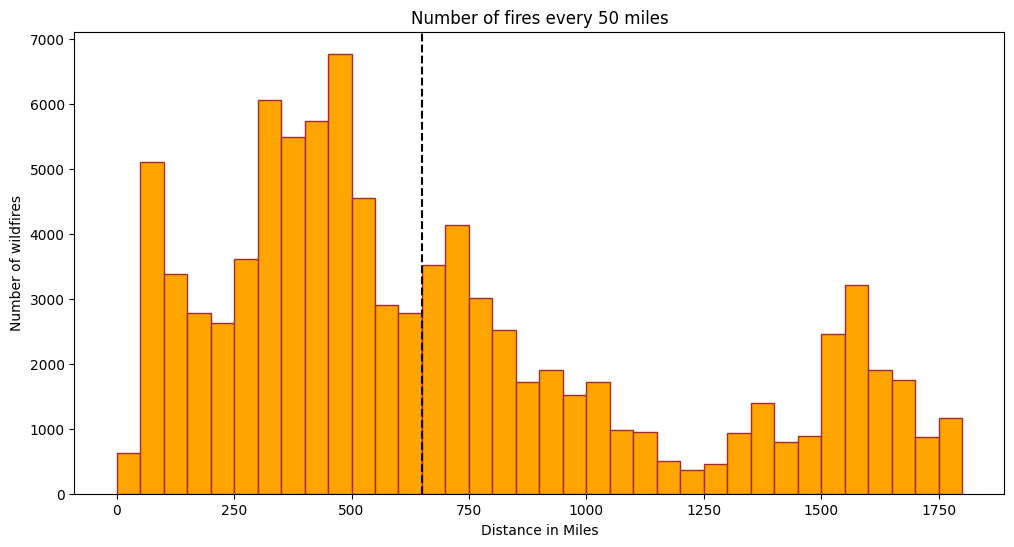

In [4]:
plt.figure(figsize=(12,6))

plt.hist(wildfires_with_distances["Closest_Distance_Miles"], bins = range(0,1801,50), edgecolor = "brown", color = "orange")

# Set the X-axis and Y axis labels, along with the title of the plot.
plt.xlabel('Distance in Miles')
plt.ylabel('Number of wildfires')
plt.title('Number of fires every 50 miles')

plt.axvline(x = 650, color = 'black', label = '650 miles', linestyle='dashed')

plt.show()

Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

In [5]:
closest_wildfires = (
    wildfires_with_distances
    .filter(
        pl.col("Closest_Distance_Miles") <= 650
    )
    .group_by(
        "Fire_Year"
    )
    .agg(
        (pl.sum("GIS_Acres")/100000).round(2).alias("GIS_Acres_in_millions")
    )
    .sort(by = "Fire_Year")
)

closest_wildfires



Fire_Year,GIS_Acres_in_millions
i64,f64
1964,3.95
1965,1.38
1966,6.74
1967,3.24
1968,2.78
…,…
2016,21.86
2017,46.64
2018,48.56


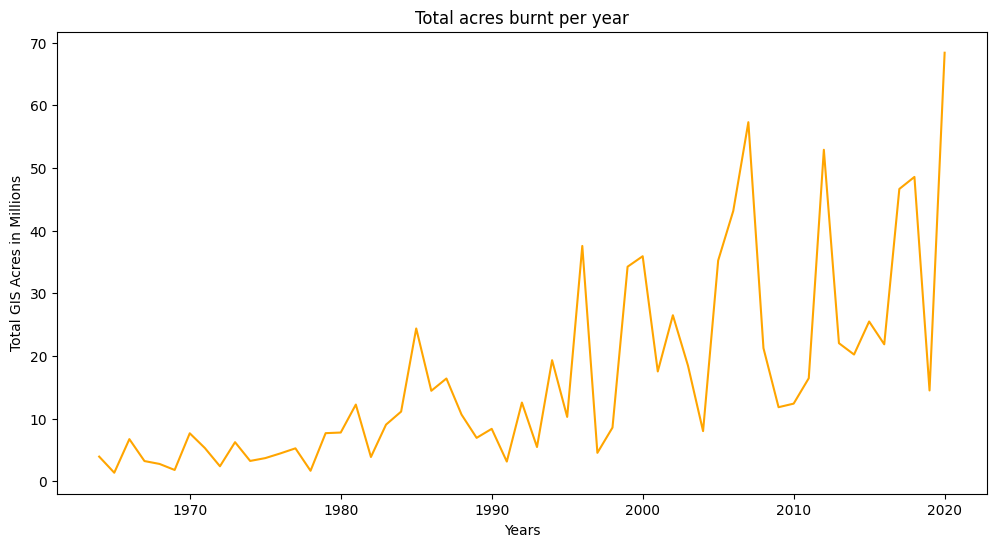

In [6]:
plt.figure(figsize=(12,6))

plt.plot(closest_wildfires["Fire_Year"],closest_wildfires["GIS_Acres_in_millions"] , color = "orange")

# Set the X-axis and Y axis labels, along with the title of the plot.
plt.xlabel('Years')
plt.ylabel('Total GIS Acres in Millions')
plt.title('Total acres burnt per year')

plt.show()

Produce a time series graph containing your fire smoke estimates for your city and the AQI estimates for your city.

In [7]:
yearly_aqi_weighted_avg = pl.read_csv("generated_files/intermediate/yearly_weighted_aqi_1964-2024.csv")
yearly_aqi_weighted_avg

year,weighted_avg_aqi
i64,f64
1964,32.41
1965,25.73
1966,21.06
1967,26.93
1968,25.57
…,…
2020,59.25
2021,52.98
2022,43.03


In [9]:
smoke_estimates_yearly = pl.read_csv("generated_files/intermediate/smoke_estimates_1964-2024.csv")
smoke_estimates_yearly

Fire_Year,sum_estimate
i64,f64
1964,17.757395
1965,7.891844
1966,18.259437
1967,10.625853
1968,16.536229
…,…
2016,29.003212
2017,48.263021
2018,38.374925


Text(0.5, 1.0, 'AQI estimates and Smoke estimates over the years')

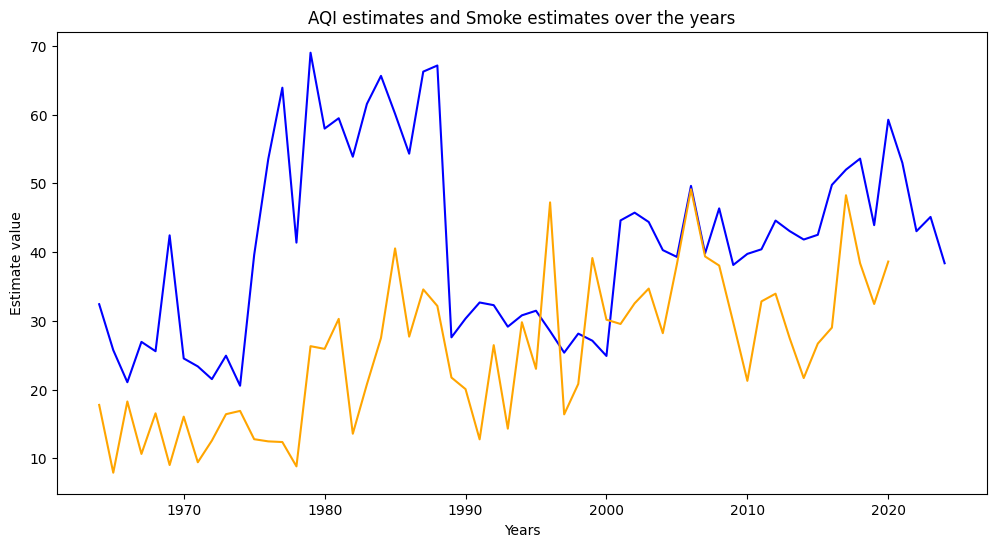

In [10]:

plt.figure(figsize=(12,6))

plt.plot(yearly_aqi_weighted_avg["year"],yearly_aqi_weighted_avg["weighted_avg_aqi"] , color = "blue")
# plt.plot(yearly_aqi_weighted_avg["year"],yearly_aqi_weighted_avg["weighted_mean_avg_aqi"] )
plt.plot(smoke_estimates_yearly["Fire_Year"], smoke_estimates_yearly["sum_estimate"], color = "orange")

# Set the X-axis and Y axis labels, along with the title of the plot.
plt.xlabel('Years')
plt.ylabel('Estimate value')
plt.title('AQI estimates and Smoke estimates over the years')